In [1]:
import os
import pandas as pd
import numpy as np
import backtrader as bt
import pyfolio as pf
import warnings
warnings.filterwarnings("ignore")

from main import config,run_treasury_futures
from utils.date import *

/Users/harry-x/opt/anaconda3/envs/hc/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


⚠️ 跑jupyter之前，把main.py输出重定向关了

## 双均线组合策略 

In [ ]:
args = config()
print(args)

args.invest = 'treasury_futures'            # 设置资产
args.data_source = 'custom'                 # 数据来源
args.strategy_name = 'MACD'                 # 设置策略
args.model_name = args.strategy_name        # 设置模型(与策略同名)

args.period_me1 = 10
args.period_me2 = 20
args.period_dif = 9

args.do_backtest = True                      # 是否回测
args.printlog = True                         # 是否打印日志

if args.invest == 'treasury_futures':
    # ---------国债期货数据相关配置
    code_list=['T.CFE','TF.CFE','TS.CFE']                               # 设置投资标的
    margin_list = [0.5,1,2]                                             # 保证金
    multiplier_list = [10000, 10000, 20000]                             # 合约系数
    begin_date_list=["2015-03-20","2013-09-06","2018-08-17"]            # 投资标的上市日期.
    begin_backtest_date_list=["2016-01-01","2014-01-01","2019-01-01"]   # 投资标的执行回测开始日期.

    if args.data_source == 'akshare':
        columns=['datetime', 'open', 'high', 'low', 'close', 'volume', 'openinterest']
    else:
        columns=['date','open','high','low','close','vwap','oi','volume']   # 数据列名（后续增加筛选后因子指标）
    args.input_size = len(columns)-1  # 输入数据维度(在框架中自动适配) -1: 除去日期列

    MACD_results,MACD_scalers = run_treasury_futures(args, code_list, margin_list, multiplier_list,
                                    columns, begin_date_list, begin_backtest_date_list)

## PatchTST策略

In [2]:
args = config()

args.invest = 'treasury_futures'            # 设置资产
args.data_source = 'custom'                 # 数据来源
args.strategy_name = 'PatchTST'             # 设置策略
args.model_name = args.strategy_name        # 设置模型(与策略同名)
args.model_type = 'regression'              # 设置模型类别

args.do_train = False                        # 是否训练
args.do_test = False                         # 是否测试
args.do_backtest = True                     # 是否回测
args.printlog = True                        # 是否打印日志

args.do_pretrain = False                    # 是否进行PatchTST预训练
args.do_finetune = False                    # 是否进行PatchTST微调


if args.model_type == 'classify':
    args.loss_function = 'cross_entropy'    # 设置损失函数
elif args.model_type == 'regression':
    args.loss_function = 'mse'

if args.invest == 'treasury_futures':
    # ---------国债期货数据相关配置
    code_list=['T.CFE','TF.CFE','TS.CFE']
    margin_list = [0.02,0.01,0.005]                                             # 保证金
    multiplier_list = [10000, 10000, 20000]                                     # 合约系数
    begin_date_list=["2015-03-20","2013-09-06","2018-08-17"]                    # 投资标的上市日期.
    end_date = "2023-07-17"                                                     # 投资标的数据截止日期.

    if args.data_source == 'akshare':
        columns=['datetime', 'open', 'high', 'low', 'close', 'volume', 'openinterest']
    else:
        columns=['date','open','high','low','close','vwap','oi','volume']   # 数据列名（后续增加筛选后因子指标）
    args.input_size = len(columns)-1  # 输入数据维度(在框架中自动适配) -1: 除去日期列

    PatchTST_results,PatchTST_scalers = run_treasury_futures(args, code_list, margin_list, multiplier_list,
                                    columns, begin_date_list, end_date)

-------------------------------
-------------------------------
正在从./datasets/treasury_futures/T.CFE_dataset_day.csv获取数据
CUDA is not available. Only CPU will be used.
PatchTST pretrain args:  Namespace(invest='treasury_futures', data_source='custom', model_name='PatchTST', model_type='regression', window_size=512, look_ahead=1, input_size=7, hidden_size=32, batch_size=32, num_epochs=20, dropout_rate=0.2, learning_rate=0.001, loss_function='mse', num_layers=1, num_classes=2, dset_pretrain='treasury_futures', dset_finetune='treasury_futures', context_points=512, target_points=1, target='close', num_workers=0, scaler='standard', features='MS', patch_len=12, stride=12, revin=1, n_layers=3, n_heads=16, d_model=128, d_ff=256, dropout=0.2, head_dropout=0.2, mask_ratio=0.4, pretrained_model=None, n_epochs_finetune=20, n_epochs_pretrain=100, lr=0.0001, pretrained_model_id=1, finetuned_model_id=1, do_pretrain=False, do_finetune=False, strategy_name='PatchTST', startcash=10000000, stake=100, comm

==========移仓换月===========
2020-08-19T00:00:00,  SELL : data_name:T2009 price : 99.285 , cost : 2002100.0 , commission : 19857.0
2020-08-19T00:00:00,  BUY : data_name:T2012 price : 98.72 , cost : 1974400.0 , commission : 19744.0
2020-08-19T00:00:00, closed symbol is : T2009 , total_profit : -820000.0000000073 , net_profit : -859878.0000000073
2020-08-19T00:00:00, open symbol is : T2012 , price : 98.72 
==========平多===========
==========开空===========
2020-10-28T00:00:00,  SELL : data_name:T2012 price : 98.315 , cost : 1974400.0 , commission : 19663.0
2020-10-28T00:00:00,  SELL : data_name:T2012 price : 98.315 , cost : 1966300.0 , commission : 19663.0
2020-10-28T00:00:00, closed symbol is : T2012 , total_profit : -405000.00000000116 , net_profit : -444407.00000000116
2020-10-28T00:00:00, open symbol is : T2012 , price : 98.315 
==========平空===========
==========开多===========
2020-10-30T00:00:00,  BUY : data_name:T2012 price : 98.02 , cost : 1966300.0 , commission : 19604.0
2020-10-30T00:0

==========开多===========
2021-01-04T00:00:00,  BUY : data_name:T2103 price : 97.95 , cost : 1959000.0 , commission : 19590.0
2021-01-04T00:00:00, open symbol is : T2103 , price : 97.95 
==========平多===========
==========开空===========
2021-01-15T00:00:00,  SELL : data_name:T2103 price : 98.19 , cost : 1959000.0 , commission : 19638.0
2021-01-15T00:00:00,  SELL : data_name:T2103 price : 98.19 , cost : 1963800.0 , commission : 19638.0
2021-01-15T00:00:00, closed symbol is : T2103 , total_profit : 239999.99999999488 , net_profit : 200771.99999999488
2021-01-15T00:00:00, open symbol is : T2103 , price : 98.19 
==========平空===========
==========开多===========
2021-01-19T00:00:00,  BUY : data_name:T2103 price : 97.825 , cost : 1963800.0 , commission : 19565.0
2021-01-19T00:00:00,  BUY : data_name:T2103 price : 97.825 , cost : 1956500.0 , commission : 19565.0
2021-01-19T00:00:00, closed symbol is : T2103 , total_profit : 364999.9999999949 , net_profit : 325796.9999999949
2021-01-19T00:00:00, ope

Final Portfolio Value: 9657713.00
===========================finish backtesting============================
CUDA is not available. Only CPU will be used.
PatchTST pretrain args:  Namespace(invest='treasury_futures', data_source='custom', model_name='PatchTST', model_type='regression', window_size=512, look_ahead=1, input_size=7, hidden_size=32, batch_size=32, num_epochs=20, dropout_rate=0.2, learning_rate=0.001, loss_function='mse', num_layers=1, num_classes=2, dset_pretrain='treasury_futures', dset_finetune='treasury_futures', context_points=512, target_points=1, target='close', num_workers=0, scaler='standard', features='MS', patch_len=12, stride=12, revin=1, n_layers=3, n_heads=16, d_model=128, d_ff=256, dropout=0.2, head_dropout=0.2, mask_ratio=0.4, pretrained_model='save_models/PatchTST/treasury_futures/T.CFE/2016-01-01/finetune/../pretrain/patchtst_pretrained_cw512_patch12_stride12_epochs-pretrain100_mask0.4_model1/model.pth', n_epochs_finetune=20, n_epochs_pretrain=100, lr=0.000

==========平多===========
==========开空===========
2022-04-07T00:00:00,  SELL : data_name:T2206 price : 100.74 , cost : 2009800.0 , commission : 20148.0
2022-04-07T00:00:00,  SELL : data_name:T2206 price : 100.74 , cost : 2014800.0 , commission : 20148.0
2022-04-07T00:00:00, closed symbol is : T2206 , total_profit : 250000.0 , net_profit : 209754.0
2022-04-07T00:00:00, open symbol is : T2206 , price : 100.74 
==========平空===========
==========开多===========
2022-04-19T00:00:00,  BUY : data_name:T2206 price : 100.31 , cost : 2014800.0 , commission : 20062.0
2022-04-19T00:00:00,  BUY : data_name:T2206 price : 100.31 , cost : 2006200.0 , commission : 20062.0
2022-04-19T00:00:00, closed symbol is : T2206 , total_profit : 429999.9999999926 , net_profit : 389789.9999999926
2022-04-19T00:00:00, open symbol is : T2206 , price : 100.31 
==========平多===========
==========开空===========
2022-04-22T00:00:00,  SELL : data_name:T2206 price : 100.215 , cost : 2006200.0 , commission : 20043.0
2022-04-22T00

==========平多===========
==========开空===========
2022-12-19T00:00:00,  SELL : data_name:T2303 price : 100.2 , cost : 1987700.0 , commission : 20040.0
2022-12-19T00:00:00,  SELL : data_name:T2303 price : 100.2 , cost : 2004000.0 , commission : 20040.0
2022-12-19T00:00:00, closed symbol is : T2303 , total_profit : 814999.9999999977 , net_profit : 775082.9999999977
2022-12-19T00:00:00, open symbol is : T2303 , price : 100.2 
==========平空===========
==========开多===========
2022-12-28T00:00:00,  BUY : data_name:T2303 price : 100.045 , cost : 2004000.0 , commission : 20009.0
2022-12-28T00:00:00,  BUY : data_name:T2303 price : 100.045 , cost : 2000900.0 , commission : 20009.0
2022-12-28T00:00:00, closed symbol is : T2303 , total_profit : 155000.00000000114 , net_profit : 114951.00000000114
2022-12-28T00:00:00, open symbol is : T2303 , price : 100.045 
==========平多===========
==========开空===========
2022-12-29T00:00:00,  SELL : data_name:T2303 price : 100.15 , cost : 2000900.0 , commission : 20

==========平多===========
==========开空===========
2023-02-01T00:00:00,  SELL : data_name:T2303 price : 100.175 , cost : 1997700.0 , commission : 20035.0
2023-02-01T00:00:00,  SELL : data_name:T2303 price : 100.175 , cost : 2003500.0 , commission : 20035.0
2023-02-01T00:00:00, closed symbol is : T2303 , total_profit : 289999.999999992 , net_profit : 249987.99999999203
2023-02-01T00:00:00, open symbol is : T2303 , price : 100.175 
==========平空===========
==========开多===========
2023-02-09T00:00:00,  BUY : data_name:T2303 price : 100.455 , cost : 2003500.0 , commission : 20091.0
2023-02-09T00:00:00,  BUY : data_name:T2303 price : 100.455 , cost : 2009100.0 , commission : 20091.0
2023-02-09T00:00:00, closed symbol is : T2303 , total_profit : -280000.00000000116 , net_profit : -320126.00000000116
2023-02-09T00:00:00, open symbol is : T2303 , price : 100.455 
==========平多===========
==========开空===========
2023-02-10T00:00:00,  SELL : data_name:T2303 price : 100.51 , cost : 2009100.0 , commiss

## 模型表现

In [3]:
#导入pyecharts
from pyecharts.charts import *
from pyecharts import options as opts

from pyecharts.commons.utils import JsCode

In [4]:
code_list=['T.CFE','TF.CFE','TS.CFE']

In [5]:
# 十年期国债期货
treasury_futures_index = 0
code = code_list[treasury_futures_index]

In [6]:
begin_train_date_list = []

### 损失函数

In [7]:
flag_break = False
begin_train_date = begin_date_list[treasury_futures_index] # 训练集开始时间

end_date = pd.to_datetime(end_date)
end_date

Timestamp('2023-07-17 00:00:00')

In [8]:
lossline = Timeline()
while True:
    begin_train_date_list.append(begin_train_date)
    end_train_date = get_end_train_date(begin_train_date)     # 训练集结束时间

    begin_valid_date = get_begin_valid_date(end_train_date)     # 验证集开始时间
    end_valid_date = get_end_valid_date(begin_valid_date)        # 验证集结束时间

    begin_test_date = get_begin_test_date(end_valid_date)     # 测试集/回测开始时间
    end_test_date = get_end_test_date(begin_test_date)        # 测试集/回测结束时间
    
    end_test_date = pd.to_datetime(end_test_date)
    if end_test_date >= end_date:
        end_test_date = end_date.strftime('%Y-%m-%d')
        flag_break = True 
        
    pretrain_loss_path = os.path.join('.','save_models',args.model_name,
                                  args.invest,code,begin_train_date,'pretrain',
                                  args.save_pretrained_model,'losses.csv')
    pretrain_loss = pd.read_csv(pretrain_loss_path)

    finetune_loss_path = os.path.join('.','save_models',args.model_name,
                                      args.invest,code,begin_train_date,'finetune',
                                      args.save_finetuned_model,'losses.csv')
    finetune_loss = pd.read_csv(finetune_loss_path)

    loss = pd.concat([pretrain_loss,finetune_loss],ignore_index=True)
    
    g = (
        Line({'width':'100%','height':'480px'})#设置画布大小，px像素
        .add_xaxis(xaxis_data=loss.index.tolist())#x数据
        .add_yaxis(
            series_name='train',#序列名称
            y_axis=loss['train_loss'].values.tolist(),#添加y数据
            is_smooth=True, #平滑曲线
            is_symbol_show=False,#不显示折线的小圆圈
            label_opts=opts.LabelOpts(is_show=False),
            linestyle_opts=opts.LineStyleOpts(width=2),)#线宽
        .add_yaxis(
            series_name='valid',#序列名称
            y_axis=loss['valid_loss'].values.tolist(),#添加y数据
            is_smooth=True, #平滑曲线
            is_symbol_show=False,#不显示折线的小圆圈
            label_opts=opts.LabelOpts(is_show=False),
            linestyle_opts=opts.LineStyleOpts(width=2),)#线宽
        .set_global_opts(#全局参数设置
            # datazoom_opts=[opts.DataZoomOpts()],#滑动模块选择
            title_opts=opts.TitleOpts(title=code+' LOSS', subtitle=begin_train_date),
            tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),)
    )
    lossline.add(g,begin_train_date)
    
    if flag_break:
        break

    begin_train_date = get_next_begin_train_date(begin_train_date) # 更新训练集开始时间

lossline.render_notebook()

#### 预测收盘价

In [11]:
lossline_close = Timeline()
lossline_return = Timeline()

data_path = os.path.join('.','datasets','treasury_futures',code+'_dataset_day.csv')
data = pd.read_csv(data_path, skiprows=1,names=columns,parse_dates=['date'],index_col='date')

for i in range(len(begin_train_date_list)):
    begin_train_date = begin_train_date_list[i]               # 训练集开始时间
    end_train_date = get_end_train_date(begin_train_date)     # 训练集结束时间

    begin_valid_date = get_begin_valid_date(end_train_date)     # 验证集开始时间
    end_valid_date = get_end_valid_date(begin_valid_date)        # 验证集结束时间

    begin_test_date = get_begin_test_date(end_valid_date)     # 测试集/回测开始时间
    end_test_date = get_end_test_date(begin_test_date)        # 测试集/回测结束时间
    end_test_date = pd.to_datetime(end_test_date)
    if end_test_date >= end_date:
        end_test_date = end_date.strftime('%Y-%m-%d')
    
    # 获取训练集标准化器
    scaler = PatchTST_scalers[treasury_futures_index][i]

    # 获取回测期间的真实数据
    backtest_mask = (data.index >= begin_test_date) & (data.index <= end_test_date)
    backtest_data = data[backtest_mask]

    # 获取回测期间的预测数据
    out_path = os.path.join('.','save_models',args.model_name,
                          args.invest,code,begin_train_date,'finetune',
                          args.save_finetuned_model,'out.npy')
    out = np.load(out_path,allow_pickle=True)
    
    mse = out[2][0]
    mae = out[2][1]
    
    testset_len = out[0].shape[0]

    pred = out[0]
    pred = pred.reshape(testset_len, args.input_size)
    pred = scaler.inverse_transform(pred)
    pred = pred[:,-1]

    targ = out[1]
    targ = targ.reshape(testset_len, args.input_size)
    targ = scaler.inverse_transform(targ)
    targ = targ[:,-1]

    out = pd.concat([pd.DataFrame(pred), pd.DataFrame(targ)], axis=1)
    out.columns = ['predict','groud-truth']
    out.index = backtest_data.index
    
    g = (
        Line({'width':'100%','height':'480px'})#设置画布大小，px像素
        .add_xaxis(xaxis_data=out.index.strftime('%Y-%m-%d').tolist())#x数据
        .add_yaxis(
            series_name='groud-truth',#序列名称
            y_axis=out['groud-truth'].values.tolist(),#添加y数据
            is_smooth=True, #平滑曲线
            is_symbol_show=False,#不显示折线的小圆圈
            label_opts=opts.LabelOpts(is_show=False),
            linestyle_opts=opts.LineStyleOpts(width=2),)#线宽
        .add_yaxis(
            series_name='predict',#序列名称
            y_axis=out['predict'].values.tolist(),#添加y数据
            is_smooth=True, #平滑曲线
            is_symbol_show=False,#不显示折线的小圆圈
            label_opts=opts.LabelOpts(is_show=False),
            linestyle_opts=opts.LineStyleOpts(width=2),)#线宽
        .set_global_opts(#全局参数设置
    #         datazoom_opts=[opts.DataZoomOpts()],#滑动模块选择
#             yaxis_opts=opts.AxisOpts(min_=104, max_=105.5),  # 设置最小值和最大值(TS)
            yaxis_opts=opts.AxisOpts(min_=100, max_=120),  # 设置最小值和最大值(T)
#             yaxis_opts=opts.AxisOpts(min_=90, max_=110),  # 设置最小值和最大值(TF)
            title_opts=opts.TitleOpts(title=code+' MSE:'+str(np.round(mse,3))+' MAE:'+str(np.round(mae,3))),
            tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),)
    )
    lossline_close.add(g,begin_test_date)
    
    out['return_groud-truth'] = out['groud-truth'].pct_change() # 当日真实收益率
    out['return_pred'] = out['predict'] / out['groud-truth'] - 1 # 预测下一日收益率
    out = out.fillna(0)
    out['return_groud-truth'] = out['return_groud-truth'].shift(-1) # 下一日真实收益率
    out = out.dropna()

    out_path = os.path.join('.','save_models',args.model_name,
                          args.invest,code,begin_train_date,'finetune',
                          args.save_finetuned_model)
    out.to_csv(out_path+'/result.csv')
    
    # 计算胜率
    correct_predictions = ((out['return_groud-truth'] * out['return_pred']) > 0).sum()
    win_rate = correct_predictions / testset_len

    
    g = (
        Line({'width':'100%','height':'480px'})#设置画布大小，px像素
        .add_xaxis(xaxis_data=out.index.strftime('%Y-%m-%d').tolist())#x数据
        .add_yaxis(
            series_name='return_groud-truth',#序列名称
            y_axis=out['return_groud-truth'].values.tolist(),#添加y数据
            is_smooth=True, #平滑曲线
            is_symbol_show=False,#不显示折线的小圆圈
            label_opts=opts.LabelOpts(is_show=False),
            linestyle_opts=opts.LineStyleOpts(width=2),)#线宽
        .add_yaxis(
            series_name='return_pred',#序列名称
            y_axis=out['return_pred'].values.tolist(),#添加y数据
            is_smooth=True, #平滑曲线
            is_symbol_show=False,#不显示折线的小圆圈
            label_opts=opts.LabelOpts(is_show=False),
            linestyle_opts=opts.LineStyleOpts(width=2),)#线宽
        .set_global_opts(#全局参数设置
            title_opts=opts.TitleOpts(title=code+' Win_rate:'+str(round(win_rate,2))),
            tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),)
    )
    lossline_return.add(g,begin_test_date)
    
    


In [12]:
lossline_close.render_notebook()

#### 预测收益率

In [13]:
lossline_return.render_notebook()

## 策略比较

In [ ]:
# MACD_result = MACD_results[treasury_futures_index]
# MACD_pyfoliozer = MACD_result.analyzers.getbyname('pyfolio')
# MACD_returns,MACD_positions,MACD_transactions,MACD_gross_lev = MACD_pyfoliozer.get_pf_items()

Start date,2023-01-03
End date,2023-07-17
Total months,6
,Backtest
Annual return,24.2%
Cumulative returns,11.7%
Annual volatility,20.5%
Sharpe ratio,1.16
Calmar ratio,2.05
Stability,0.45
Max drawdown,-11.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,11.81,2023-01-31,2023-04-03,2023-05-05,69
1,6.36,2023-06-05,2023-06-14,NaT,NaN
2,3.13,2023-01-18,2023-01-20,2023-01-30,9
3,2.00,2023-05-23,2023-05-26,2023-06-02,9
4,1.89,2023-05-11,2023-05-17,2023-05-23,9


Stress Events,mean,min,max
New Normal,0.09%,-2.34%,3.34%


Top 10 long positions of all time,max
T2306,21.18%
T2303,20.65%
T2309,18.91%


Top 10 short positions of all time,max


Top 10 positions of all time,max
T2306,21.18%
T2303,20.65%
T2309,18.91%
index,0.00%
T2012,0.00%
T2103,0.00%
T2106,0.00%
T2109,0.00%
T2112,0.00%
T2203,0.00%


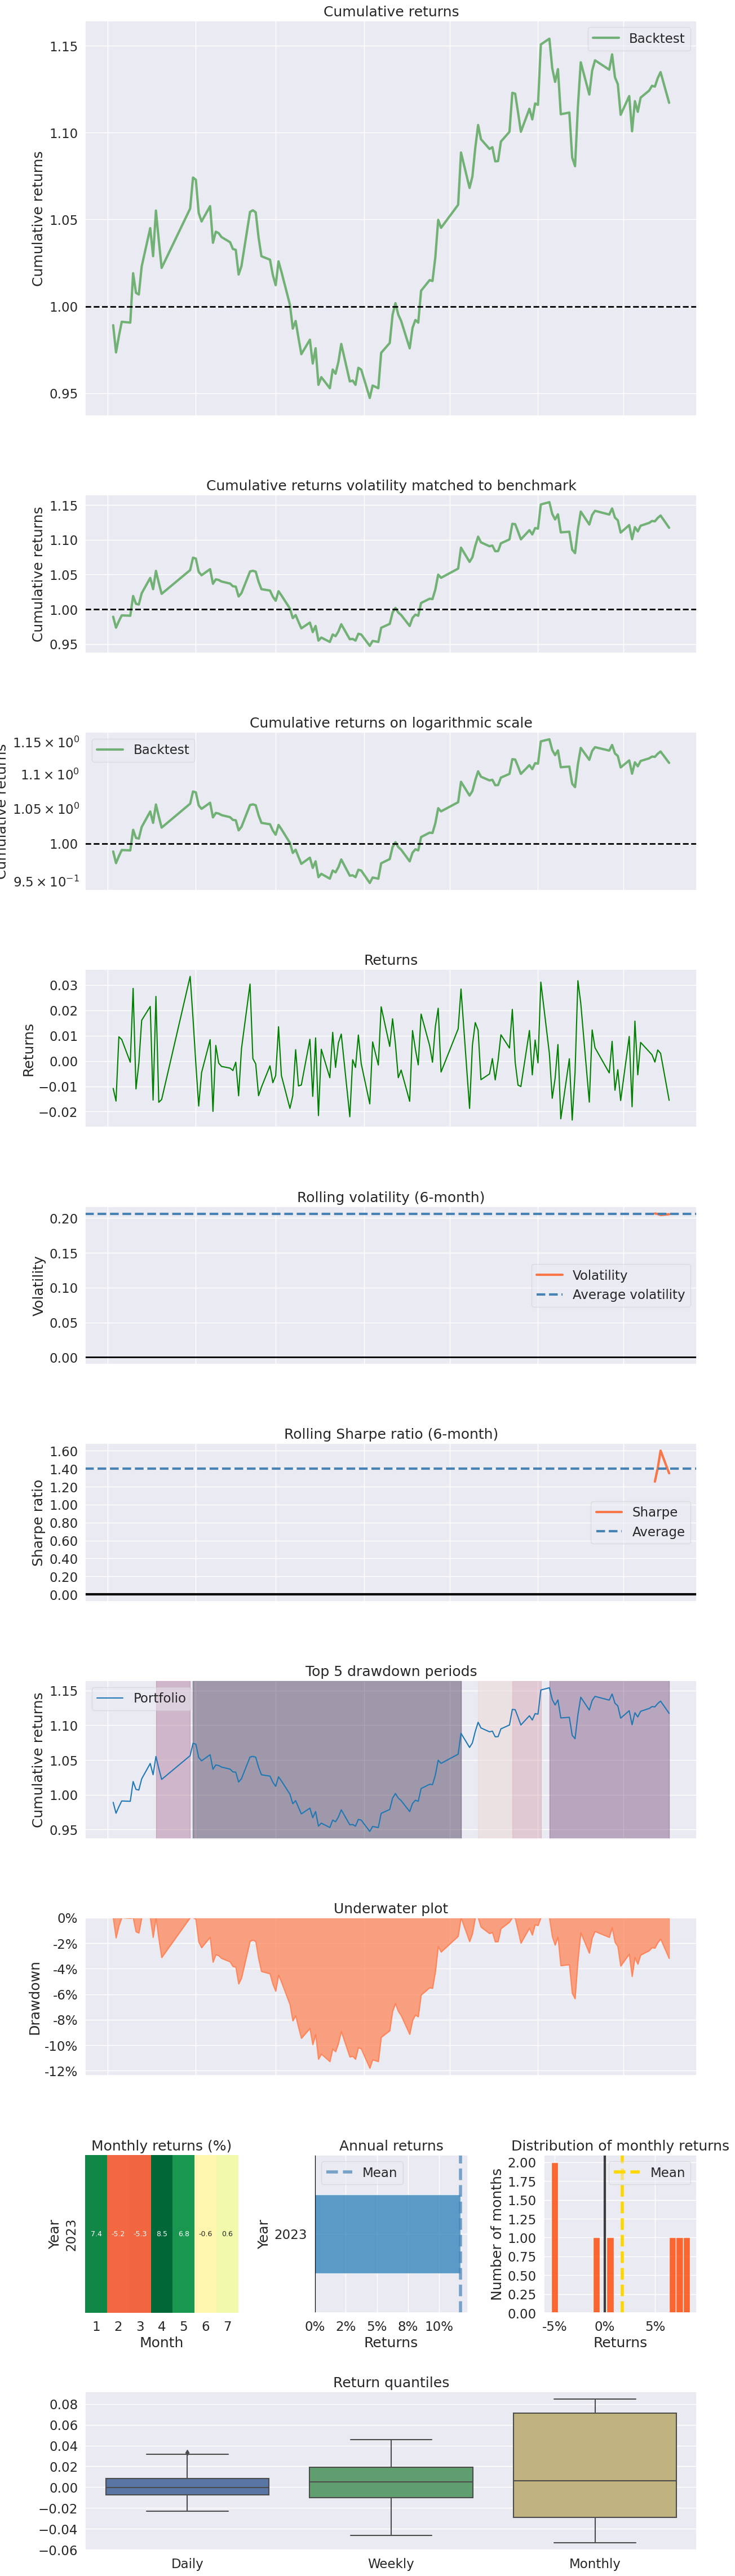

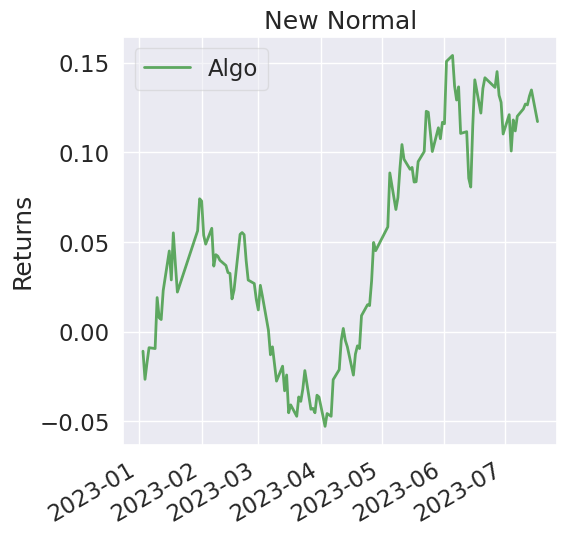

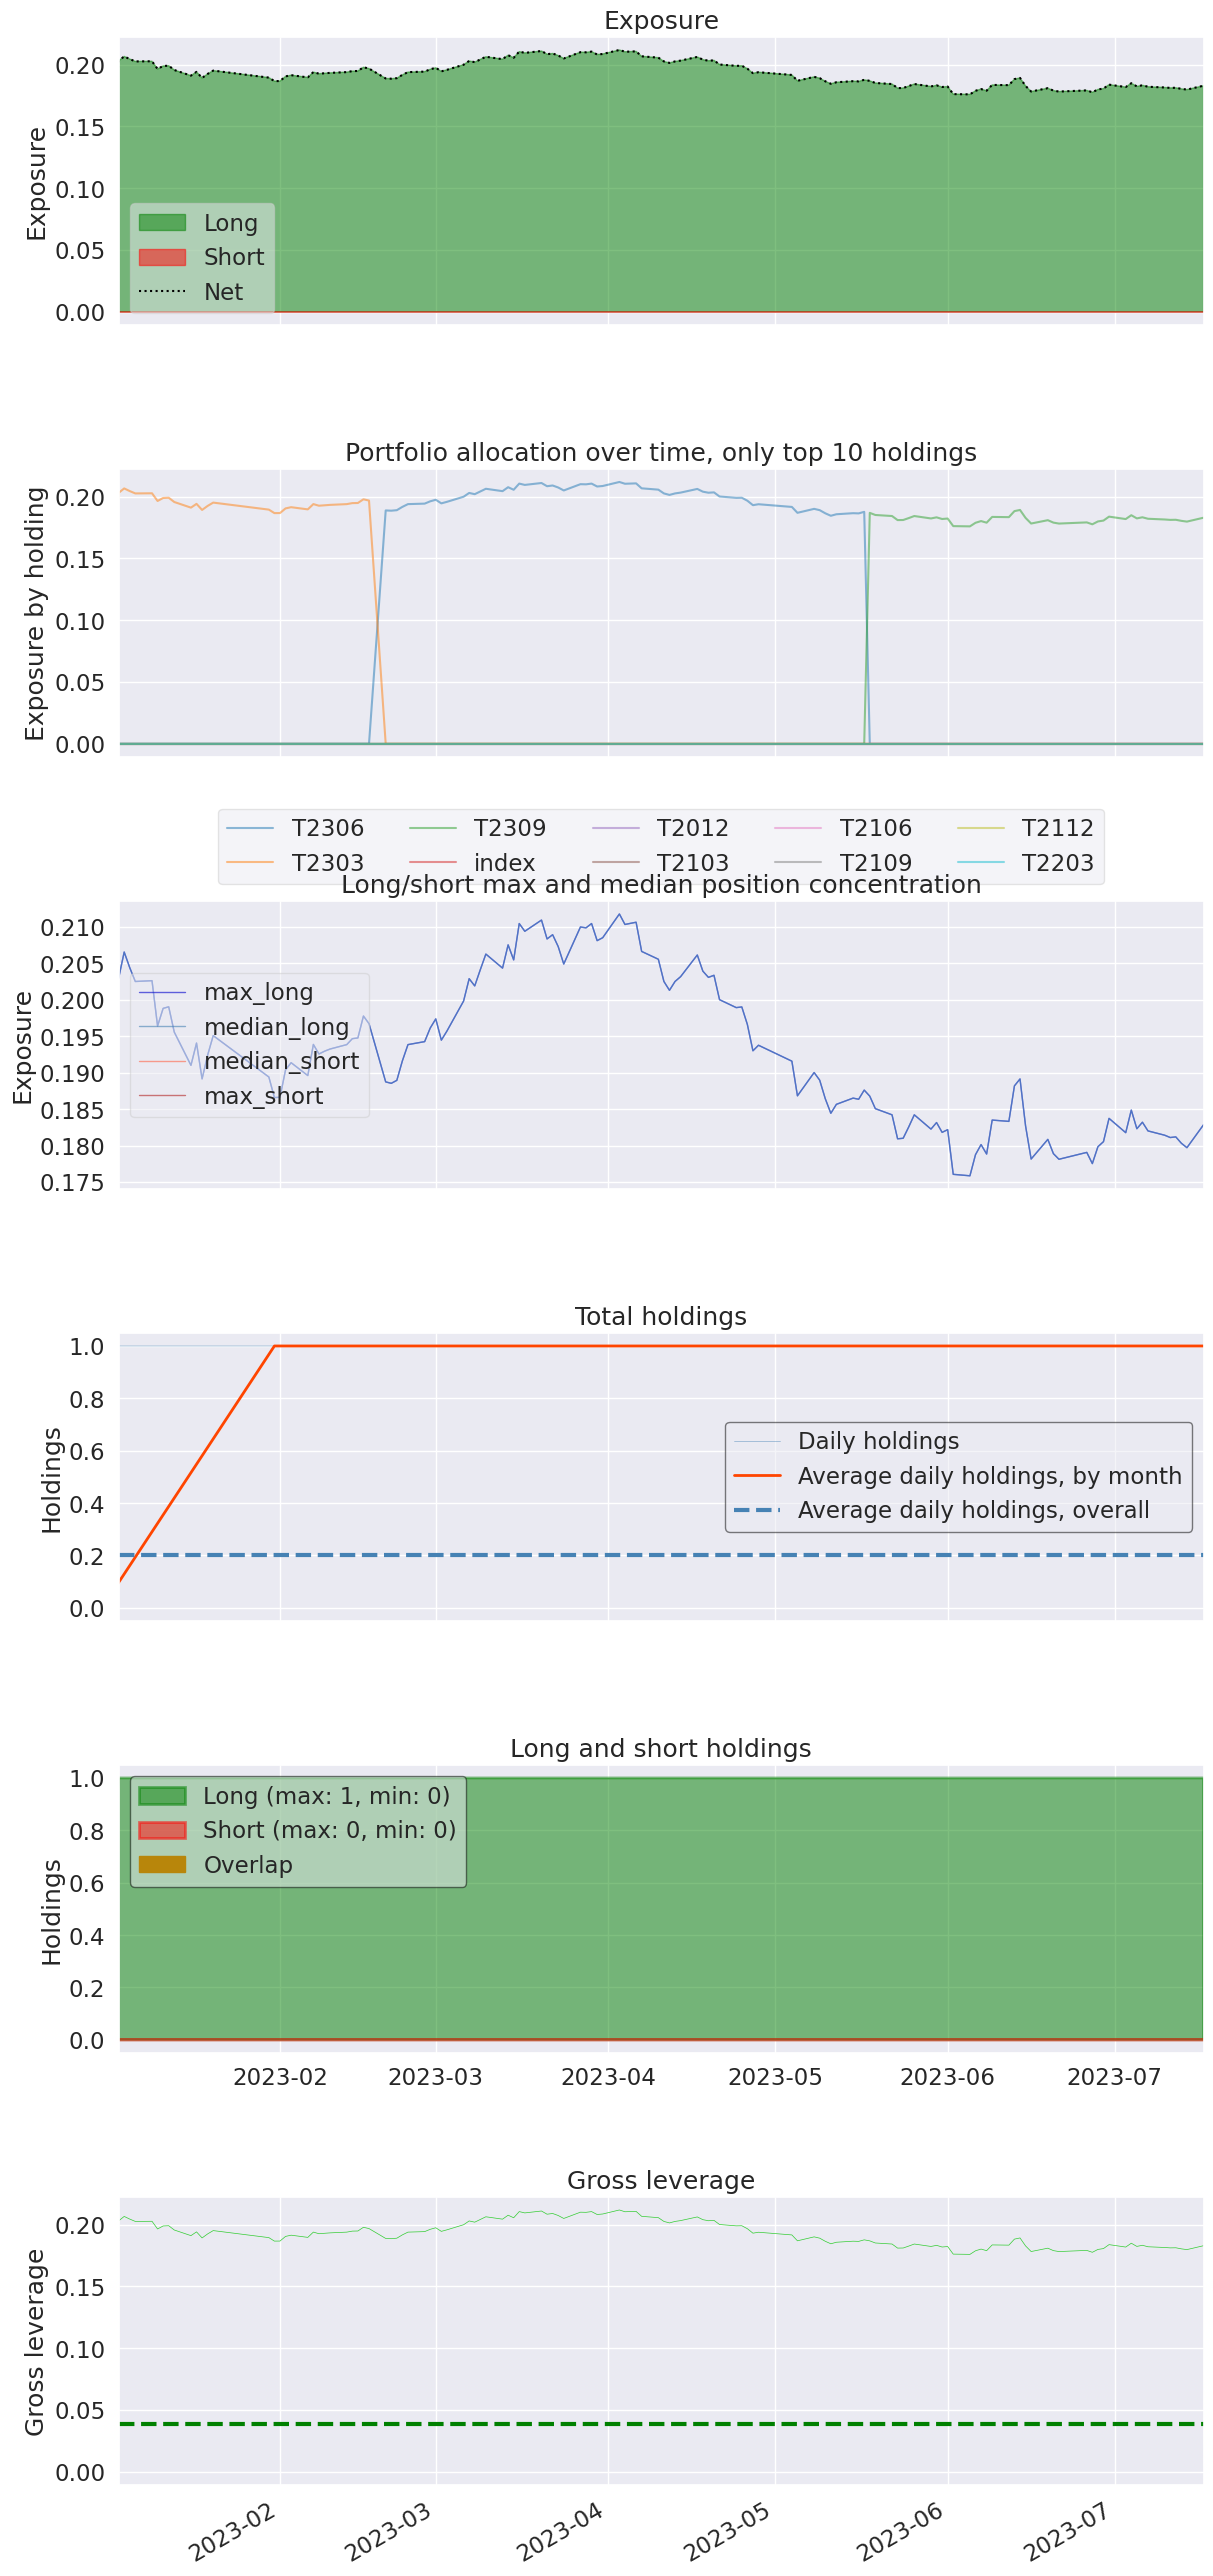

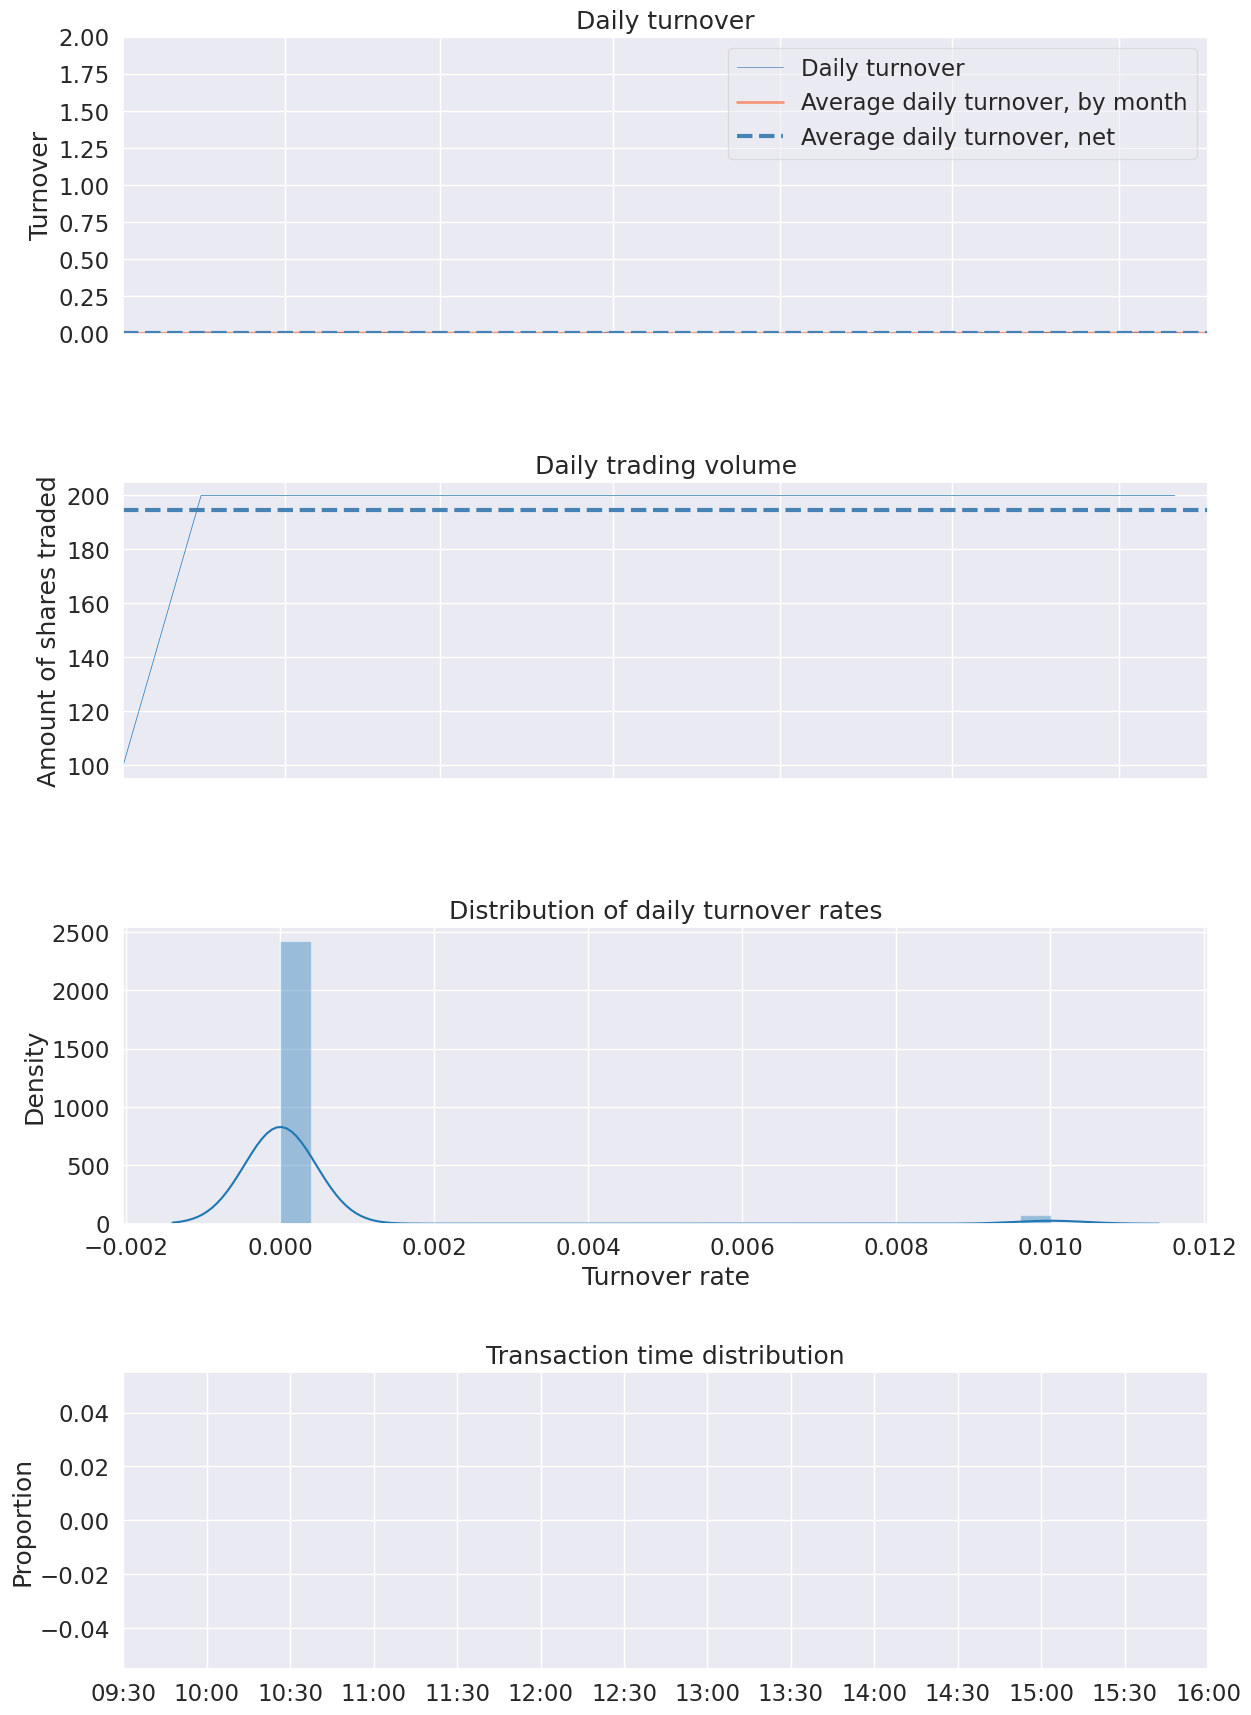

In [17]:
PatchTST_result_i = PatchTST_results[treasury_futures_index]

for i in range(len(begin_train_date_list)):
    if i<3:
        continue
    begin_train_date = begin_train_date_list[i]               # 训练集开始时间
    end_train_date = get_end_train_date(begin_train_date)     # 训练集结束时间

    begin_valid_date = get_begin_valid_date(end_train_date)     # 验证集开始时间
    end_valid_date = get_end_valid_date(begin_valid_date)        # 验证集结束时间

    begin_test_date = get_begin_test_date(end_valid_date)     # 测试集/回测开始时间
    end_test_date = get_end_test_date(begin_test_date)        # 测试集/回测结束时间
    end_test_date = pd.to_datetime(end_test_date)
    if end_test_date >= end_date:
        end_test_date = end_date.strftime('%Y-%m-%d')
        
    PatchTST_result = PatchTST_result_i[i]
    PatchTST_pyfoliozer = PatchTST_result.analyzers.getbyname('pyfolio')
    PatchTST_returns,PatchTST_positions,PatchTST_transactions,PatchTST_gross_lev = PatchTST_pyfoliozer.get_pf_items()
    
    returns = pd.DataFrame(PatchTST_returns)
    returns.rename(columns={'return': 'PatchTST_returns'}, inplace=True)
    
    # 获取回测期间的收益率数据
    returns = returns[begin_test_date:end_test_date]
    
    pf.create_full_tear_sheet(
        returns=returns['PatchTST_returns'],
        positions=PatchTST_positions,
        transactions=PatchTST_transactions)
    break
    



In [ ]:
import matplotlib.pyplot as plt
def plot_net_worth(df):
    # 计算净值曲线
    net_worth = (df + 1).cumprod()

    # 绘制净值曲线
    net_worth.plot()
    plt.title('Net Worth Curves')
    plt.xlabel('Date')
    plt.ylabel('Net Worth')
    plt.grid(True)
    plt.legend()
    plt.show()

    return net_worth

df = plot_net_worth(returns)  # 传入包含回报率的DataFrame